# Alguns conceitos de estatistica, part I

## 1. Amostra

- Um parcela de uma populção escolhida de forma que todos os elementos da população tenha chances iguais de serem selecionados

  ### 1.1 Com reposição
- Após o elemento ser selecionando, ele é colocado de novo na população, tendo as mesmas chances de ser selecionando de novo para a amostra

  ### 1.2 Sem reposição
- o elemento é retirado da população, se for selecionando, não é reposto de novo à população

  ### 1.3 Tipos
  ### 1.3.1 Amostra aleatória simples
    - Um determinado número N é retirado da população de forma aleatoria.

In [1]:
import pandas as pandas
import numpy as numpy
from sklearn.model_selection import train_test_split
from math import ceil #serve para arredondar

In [2]:
base = pandas.read_csv('data/iris.csv')
base.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
base.shape

(150, 5)

In [4]:
base["class"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: class, dtype: int64

In [5]:
rows = numpy.random.choice(range(150), size=20, replace=False)
rows

array([ 96,   7,  55,  90,  92,  10, 135, 129,   5, 121, 139,  16,  28,
        45, 117,  62,  60, 149,  15,  51])

In [6]:
amostra1 = base.loc[rows]
amostra1

,sepal length,sepal width,petal length,petal width,class
96,5.7,2.9,4.2,1.3,Iris-versicolor
7,5.0,3.4,1.5,0.2,Iris-setosa
55,5.7,2.8,4.5,1.3,Iris-versicolor
90,5.5,2.6,4.4,1.2,Iris-versicolor
92,5.8,2.6,4.0,1.2,Iris-versicolor
10,5.4,3.7,1.5,0.2,Iris-setosa
135,7.7,3.0,6.1,2.3,Iris-virginica
129,7.2,3.0,5.8,1.6,Iris-virginica
5,5.4,3.9,1.7,0.4,Iris-setosa
121,5.6,2.8,4.9,2.0,Iris-virginica


In [7]:
amostra1.index = range(20)
amostra1

,sepal length,sepal width,petal length,petal width,class
0,5.7,2.9,4.2,1.3,Iris-versicolor
1,5.0,3.4,1.5,0.2,Iris-setosa
2,5.7,2.8,4.5,1.3,Iris-versicolor
3,5.5,2.6,4.4,1.2,Iris-versicolor
4,5.8,2.6,4.0,1.2,Iris-versicolor
5,5.4,3.7,1.5,0.2,Iris-setosa
6,7.7,3.0,6.1,2.3,Iris-virginica
7,7.2,3.0,5.8,1.6,Iris-virginica
8,5.4,3.9,1.7,0.4,Iris-setosa
9,5.6,2.8,4.9,2.0,Iris-virginica


   ### 1.3.2 Amostra estratificada
   -  A população é dividida em estratos(grupos, por exemplo, educação, raça, etcs) das quais é retirado uma quantidade proporcional de elementos de todos os estratos

In [8]:
base["class"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: class, dtype: int64

In [9]:
X, _, Y, _ = train_test_split(base.iloc[:, 0:4], base.iloc[:, 4], 
                              test_size=0.5, stratify=base.iloc[:,4])
Y.value_counts()

Iris-setosa        25
Iris-virginica     25
Iris-versicolor    25
Name: class, dtype: int64

In [10]:
print(Y.shape)
print(X.shape)

(75,)
(75, 4)


In [11]:
infert = pandas.read_csv('data/infert.csv')
infert["education"].value_counts()

6-11yrs    120
12+ yrs    116
0-5yrs      12
Name: education, dtype: int64

In [12]:
x1, _, y1, _ = train_test_split(infert.iloc[:, 2:9], infert.iloc[:, 1],
                                test_size=0.6, stratify=infert.iloc[:,1])

y1.value_counts()

6-11yrs    48
12+ yrs    46
0-5yrs      5
Name: education, dtype: int64

In [13]:
print(y1.shape)
print(x1.shape)

(99,)
(99, 7)


   ### 1.3.3 Amostra sistemática
   - É escolhido um numero N aleatório, então, a cada N elementos da população, um elemento é selecionado.

In [14]:
populacao = 150
amostra_size = 15
N = ceil(populacao / amostra_size)
r = numpy.random.randint(low=1, high=N + 1, size=1)

In [15]:
print(N)
print(r)

10
[6]


In [16]:
sorteados = []
acumulador = r[0]

for i in range(amostra_size):
    sorteados.append(acumulador)
    acumulador += N


In [17]:
amostra2 = base.loc[sorteados]
amostra2.index = range(15)
amostra2

,sepal length,sepal width,petal length,petal width,class
0,4.6,3.4,1.4,0.3,Iris-setosa
1,5.4,3.9,1.3,0.4,Iris-setosa
2,5.0,3.4,1.6,0.4,Iris-setosa
3,5.5,3.5,1.3,0.2,Iris-setosa
4,5.1,3.8,1.6,0.2,Iris-setosa
5,6.3,3.3,4.7,1.6,Iris-versicolor
6,5.6,3.0,4.5,1.5,Iris-versicolor
7,6.8,2.8,4.8,1.4,Iris-versicolor
8,6.7,3.1,4.7,1.5,Iris-versicolor
9,5.7,2.9,4.2,1.3,Iris-versicolor


## 2. Medidas

 ### 2.1 Media

In [18]:
from scipy import stats

In [19]:
jogadores = [40000, 18000, 12000, 250000, 30000, 140000, 300000, 40000, 800000]

In [20]:
media = numpy.mean(jogadores)
media

181111.11111111112

 ### 2.2 Moda

In [21]:
moda = stats.mode(jogadores)
moda

ModeResult(mode=array([40000]), count=array([2]))

 ### 2.3 Mediana

In [22]:
mediana = numpy.median(jogadores)
mediana

40000.0

 ### 2.4 Desvio padrão

In [23]:
desvio_padrao = numpy.std(jogadores, ddof=1)
desvio_padrao

255307.87514511007

 ## 2.5 Variância

In [25]:
variancia = numpy.power(desvio_padrao,2)
variancia

65182111111.111115

 ## 2.6 Quartis

In [26]:
quartis = numpy.quantile(jogadores, [0, 0.25, 0.5, 0.75, 1])
quartis

array([ 12000.,  30000.,  40000., 250000., 800000.])

 ### 2.7 De forma geral

In [27]:
stats.describe(jogadores)

DescribeResult(nobs=9, minmax=(12000, 800000), mean=181111.11111111112, variance=65182111111.11111, skewness=1.758635899846188, kurtosis=1.9572075427527729)

 ## 3. Probabilidade (basica)
 
 - Eventos Excludentes: eventos que não podem ocorrer ao mesmo tempo. Exemplos: 
   - jogar dado, e cair 1 ou 6 -> 2/6 -> 0.33
   - jogar dado, cair 1 ou par -> (1/6 + 3/6) -> 4/6 -> 0.66
 - Eventos não Excludentes:  eventos que podem ocorrer ao mesmo tempo. Exemplos:
   - jogar dado, cair impar(1,3,5) ou maior que 4(6) -> 4/6 -> 0.66
   - jogar dado, cair 2 ou par -> (2,4,6) -> 3/6 -> 0.5
 - Eventos dependentes: eventos que dependem de outro, ou acarretam outro eventos. Exemplo:
   - com 6 cartas(A,2,3,4,5,6), tirar A e depois tirar 4 -> 1/6 * 1/5 -> 1/30 -> 0.033
 - Eventos independentes:  a ocorrencia de um evento não afeta outro. Exemplos:
   - jogar 2 dados, e cair 1 e 6 -> 1/6 * 1/6 -> 0.027
   - jogar 2 dado, e cair ou 1 ou 6 -> (1/6 * 5/6) + (1/6 * 5/6) -> 0.27

 ### 3.1 Distribuição Binomial
 
  - Estudado o comportamendo de dados aleatórios, desde que estes sejam eventos discretos
  - Pré-requisitos:
    - número fixo de experimentos
    - cada experimento so tem 2 resultados: sucesso ou fracasso
    - mesma probabilidade de ser sucesso é igual em cada experimento
    - os experimentos são idependentes

In [28]:
from scipy.stats import binom

In [29]:
# Jogar uma moeda 5 vezes, qual a probabilidade de dar cara 3 vezes?
prob = binom.pmf(3,5,0.5)
prob

0.3125

In [30]:
# Passar por 4 sinais de 4 tempos, qual a probabilidade de pegal sinal verde nenhum, 1, 2, 3 e 4 vezes seguidas?
zero = binom.pmf(0,4,0.25)
um = binom.pmf(1,4,0.25)
dois = binom.pmf(2,4,0.25)
tres = binom.pmf(3,4,0.25)
quatro = binom.pmf(4,4,0.25)

print(zero,um,dois,tres,quatro, "\n")

# se for sinais de dois tempos?
zero1 = binom.pmf(0,4,0.5)
um1 = binom.pmf(1,4,0.5)
dois1 = binom.pmf(2,4,0.5)
tres1 = binom.pmf(3,4,0.5)
quatro1 = binom.pmf(4,4,0.5)

print(zero1,um1,dois1,tres1,quatro1)

0.31640625000000006 0.4218750000000001 0.21093750000000006 0.046875000000000035 0.003906250000000001 

0.0625 0.25000000000000006 0.3750000000000001 0.25000000000000006 0.0625


In [31]:
# probabilidade acumulativa
p = binom.cdf(4,4,0.25)
p

1.0

In [33]:
# concurso de 12 questoes, qual a probabilidade de acertar 7 questoes considerando que cada questao tem 4 alternativas?

prob1 = binom.pmf(7,12,0.25)
prob1

0.011471271514892573

 ### 3.2 Distribuição Normal
  
  -  Centraliza a média dos dados, cerca de 68% dos dados estão a um desvio padrão da média, e 27% a dois desvio padrão da media, 4,2% ate três desvio padrão
  - Teorema central do limite:
    - Conforme o tamanho da amostra aumenta, a distribuição das médias amostrais se aproxima cada vez mais da distribuição normal
    - Independente de como os dados estão distribuídos, suas médias estarão normalmente distribuídas
  - Distribuição normal padrão
    - Padroniza uma distribuição para a distribuição normal
    - Mostra o número de desvios padrão a qual um valor se encontra, acima ou abaixo da média.
    - Média zero
    - Desvio padrão 1

In [34]:
from scipy.stats import norm

In [35]:
# Conjunto de objetos em uma cesta, a média é 8 e o desvio  padrão é 2 qual a probabilidade de tirar um objeto  
# cujo o peso é menor que 6 quilos?
prob = norm.cdf(6,8,2)
prob

0.15865525393145707

In [36]:
# Qual a probabilidade de tirar um objeto cujo peso é maior que 6 quilos?
prob1 = norm.sf(6,8,2)
prob1

0.8413447460685429

In [37]:
# prob1 == p
p = 1 - prob
p

0.8413447460685429

In [38]:
# Qual a probabilidade de tirar um objeto que o peso é menor que 6 OU maior que 10 quilos?
prob2 = norm.cdf(6,8,2) + norm.sf(10,8,2)
prob2

0.31731050786291415

In [39]:
# Qual a probabilidade de tirar um objeto cujo peso seja menor que 10 E maior que 8 quilos?
prob3 = norm.cdf(10,8,2) - norm.cdf(8,8,2)
prob3

0.3413447460685429

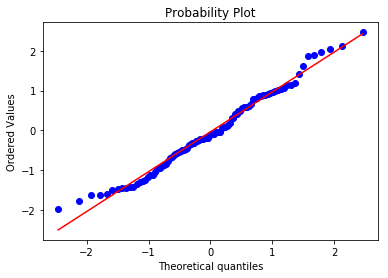

In [43]:
# verificando se a distribuição é normal
import matplotlib.pyplot as plt

dados = norm.rvs(size=100) # criando dados na distribuição normal
stats.probplot(dados, plot=plt)
plt.show()

In [44]:
# teste de shapiro
s = stats.shapiro(dados)
s

(0.9814712405204773, 0.1728079468011856)